In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import torch 
from torch import nn

In [2]:
train_x = np.load('npy2.0/arr_3d.npy').astype(np.double)
train_y = np.load('npy2.0/age_final.npy').astype(np.double)
test_x  = np.load('testnpy/test_3d.npy').astype(np.double)
test_y = np.load('testnpy/age_test.npy').astype(np.double)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3240, 135, 189) (3240,) (100, 135, 189) (100,)


21.0


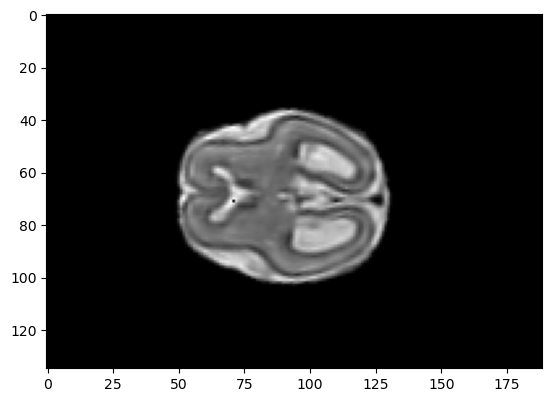

In [3]:
train_x_1 = train_x[1]
plt.imshow(train_x_1, cmap='gray')
print(train_y[1])
plt.imshow(test_x[2], cmap='gray')

In [4]:
import torch
class GetLoader(torch.utils.data.Dataset):
    def __init__(self, data_root, data_label):
        self.data = data_root
        self.label = data_label
    def __getitem__(self, index):
        data = self.data[index]
        label = self.label[index]
        return data, label
    def __len__(self):
        return len(self.data)

train_data = GetLoader(train_x, train_y)
test_data = GetLoader(test_x, test_y)

In [5]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)
for i, (data, label) in enumerate(train_dataloader):
    print("第 {} 个Batch \n".format(i))
    print("label: ", label[0].numpy())
    # plt.imshow(data[0], cmap='gray')
    data = data.unsqueeze(dim=1)
    print(data.shape, label.shape)

第 0 个Batch 

label:  33.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 1 个Batch 

label:  31.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 2 个Batch 

label:  38.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 3 个Batch 

label:  23.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 4 个Batch 

label:  24.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 5 个Batch 

label:  30.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 6 个Batch 

label:  22.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 7 个Batch 

label:  28.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 8 个Batch 

label:  27.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 9 个Batch 

label:  32.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 10 个Batch 

label:  38.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 11 个Batch 

label:  21.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 12 个Batch 

label:  28.0
torch.Size([32, 1, 135, 189]) torch.Size([32])
第 13 个Batch 

label:  23.0
torch.Size([32, 1, 13

In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [7]:
net = nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5,padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6,16,kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,84),
    nn.ReLU(),
    nn.Linear(84,10)
)

In [8]:
net = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=5, padding=2),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),

    nn.Conv2d(8, 16, kernel_size=5),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),

    nn.Conv2d(16,32, kernel_size=5),
    nn.BatchNorm2d(32),
    nn.ReLU(),

    nn.Conv2d(32, 32, kernel_size=5),
    nn.BatchNorm2d(32),
    nn.ReLU(),

    nn.Dropout2d(0.3),
    nn.Flatten(),
    nn.Linear(27232, 120),
    nn.ReLU(),
    nn.Linear(120, 1) 
)

In [9]:
class ConvNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.flatten = nn.Flatten()
        self.network = net

    def forward(self, x):
        logits = self.network(x)
        return logits

In [10]:
model = ConvNetwork().to(device).double()
print(model)

ConvNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Dropout2d(p=0.3, inplace=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=27232, out_features=

In [11]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [12]:
#训练
def train(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    model.train()
    """
    训练过程：对于dataloader给的每一个batch
    首先得到前向传播的结果
    接着计算loss
    然后反向传播计算梯度
    最后优化模型（更新参数）
    """
    for batch, (X,y) in enumerate(dataloader):
        X = torch.squeeze(X)
        X,y = X.to(device),y.to(device)
        X = X.unsqueeze(dim=1)
        y = y.flatten()
        pred = model(X).flatten()
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss}  [{current}/{size}]")

def test(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    model.eval()
    loss,acc = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(test_dataloader):
            X,y = X.to(device),y.to(device)
            X = X.unsqueeze(dim=1)
            y = y.flatten()
            pred = model(X).flatten()
            loss += loss_fn(pred,y).item()
            for i in range(len(pred)):
                if(torch.abs(pred[i]-y[i])<=1):
                    acc += 1        
    test_loss = loss/num_batches
    acc = acc/size
    print(f"Test Error: \n Accuracy: {(100*acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [13]:
import copy
epoch = 100
best_acc = 0
best_model = None
for i in range(epoch):
    print(f"Epoch {i+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    with torch.no_grad():
        acc = 0
        size = len(test_dataloader.dataset)
        for batch, (X, y) in enumerate(test_dataloader):
            X,y = X.to(device),y.to(device)
            X = X.unsqueeze(dim=1)
            y = y.flatten()
            pred = model(X).flatten()
            for i in range(len(pred)):
                if(torch.abs(pred[i]-y[i])<=1):
                    acc += 1
                # print(f"pred = {pred[i].item():.2f}, real = {y[i].item():.2f}")
    print(f"acc: {acc/size:.2f}")
    if acc / size > best_acc:
        best_acc = acc / size
        best_model = copy.deepcopy(model.state_dict())
print("Done!")

Epoch 1
-------------------------------
loss: 899.7583893005516  [32/3240]
loss: 45.69184230645665  [352/3240]
loss: 37.02170505603953  [672/3240]
loss: 17.650615697782754  [992/3240]
loss: 14.864547904210594  [1312/3240]
loss: 15.166347951491279  [1632/3240]
loss: 11.599783983816712  [1952/3240]
loss: 17.788032815655114  [2272/3240]
loss: 8.3070088402145  [2592/3240]
loss: 15.297548584765222  [2912/3240]
loss: 12.156645589470784  [3232/3240]
acc: 0.25
Epoch 2
-------------------------------
loss: 20.407082699286136  [32/3240]
loss: 22.97644955754975  [352/3240]
loss: 15.10995819424354  [672/3240]
loss: 16.698047123376085  [992/3240]
loss: 24.47730282948137  [1312/3240]
loss: 19.1663388991357  [1632/3240]
loss: 24.218423046479074  [1952/3240]
loss: 16.66311627090512  [2272/3240]
loss: 14.755389947321586  [2592/3240]
loss: 11.598948956849132  [2912/3240]
loss: 23.26700489891518  [3232/3240]
acc: 0.14
Epoch 3
-------------------------------
loss: 28.05449468476978  [32/3240]
loss: 16.237

In [47]:
model.load_state_dict(best_model)
with torch.no_grad():
    acc = 0
    size = len(test_dataloader.dataset)
    for batch, (X, y) in enumerate(test_dataloader):
            X,y = X.to(device),y.to(device)
            X = X.unsqueeze(dim=1)
            y = y.flatten()
            pred = model(X).flatten()
            for i in range(len(pred)):
                if(torch.abs(pred[i]-y[i])<=1):
                    acc += 1
                # print(f"pred = {pred[i].item():.2f}, real = {y[i].item():.2f}")
    print(f"acc: {acc/size:.2f}")


acc: 0.68


In [49]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [50]:
model1 = ConvNetwork()
model1.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [86]:
input = torch.tensor(test_x[30]).unsqueeze(dim=0).unsqueeze(dim=0).to(device) #[1(batch_num),1(channel_num),w,h]
output = model1(input)
print(output.item(), test_y[30])

25.787114862011094 26.285714285714285
